In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Power law distribution fitting

We cannot use a Kolmogrov Smirnow test for the purpose of fitting a power law distribution because it is made for continuous distrbutions, which means when applied to discrete distributions the p-values will not be aproximated properly. This discrete version works when the quantity can only assume positive integers. Since we are testing the absolute return and volume distributions, it works

Thus, we use the method for fitting a discrete power law set out in:
 Bessi, A. (2015). Two samples test for discrete power-law distributions. arXiv preprint arXiv:1503.00643.

In [2]:
# Generalized Horowitz zeta function

# generalized Hurwitz zeta function
def zeta(data, alpha,x_min):
    zeta_statistic = sum(len(data) + np.min(data))**-alpha
    return zeta_statistic


# Probability distribution
def Probability_distribution_Horowitz(data, x_value, alpha):
    x_min = np.min(data)
    (x_value**-alpha)/zeta(data, alpha, x_min)
    
# cummulative probability distribution
def Cummulative_probability_distribution_Horowitz(data, alpha, x_value):
    x_min = np.min(data)
    p_X_larger_than_x = zeta(data, alpha, x_value)/zeta(data, alpha, x_min)
    return p_X_larger_than_x


In [3]:
def alpha_estimator(data):
    x_min = np.min(data)
    alpha_estimate = 1 + (len(data)*np.sum(np.log(data/x_min-0.5)))**-1
    return alpha_estimate

In [4]:
def LAMDA_statistic(dataset_1, dataset_2):
    pooled_datasets = np.concatenate((dataset_1, dataset_2))
    x_min_1 = np.min(dataset_1)
    x_min_2 = np.min(dataset_2)
    # LAMDA_statistic = (len(dataset_1)*np.sum(np.log(dataset_1/x_min_1-0.5)))/(len(dataset_2)*np.sum(np.log(dataset_2/x_min_2-0.5)))
    return LAMDA_statistic
    

In [5]:
def power_law_log_likelihood(alpha, data):
    '''Data is a numpy array, alpha is a float. ssuming that data are drawn from a power law distribution with x >= x_min and exponent alpha'''
    n = data.shape[0]
    x_min = np.min(data)
    log_likelihood = n*np.log(alpha) + n*alpha*np.log(x_min) + (alpha + 1)* np.sum(np.log(data))
    return log_likelihood

$Λ = -2 \times l(H_0|s_1 \cup s_2) + 2 \times [l(H_1|s_1) + l(H_1|s_2)]$

In [6]:
def Bessis_LAMBDA(dataset_1, dataset_2):
    alpha_dataset_1 = alpha_estimator(dataset_1)
    alpha_dataset_2 = alpha_estimator(dataset_2)
    pooled_datasets = np.concatenate((dataset_1, dataset_2))
    alpha_pooled_datasets = alpha_estimator(pooled_datasets)
    LAMDA_statistic = -2 * power_law_log_likelihood(alpha_pooled_datasets, pooled_datasets) + 2*(power_law_log_likelihood(alpha_dataset_1, dataset_1) + power_law_log_likelihood(alpha_dataset_2, dataset_2))
    return LAMDA_statistic

In [7]:
# chi squared test
def chi_squared_test(dataset_1, dataset_2):
    LAMDA_statistic = Bessis_LAMBDA(dataset_1, dataset_2)
    p = stats.chi2.cdf(LAMDA_statistic, 1)
    # uncomment to plot chi squared distribution
    xs = np.arange(0, 1, 0.01)
    chi_data_point = [stats.chi2.cdf(i,1) for i in xs]
    plt.ylabel('commulative probability')
    plt.xlabel('chi squared value')
    plt.plot(xs, chi_data_point)
    plt.axvline(x=p, color='r')
    return p


# Let's test it on simulated data

In [8]:
# generate random samples from powerlaw distribution
def generate_power_law_sample(alpha, x_min, x_max, size):
    x = np.random.uniform(x_min, x_max, size)
    y = np.random.uniform(0, 1, size)
    return x[y < (x**-alpha)]


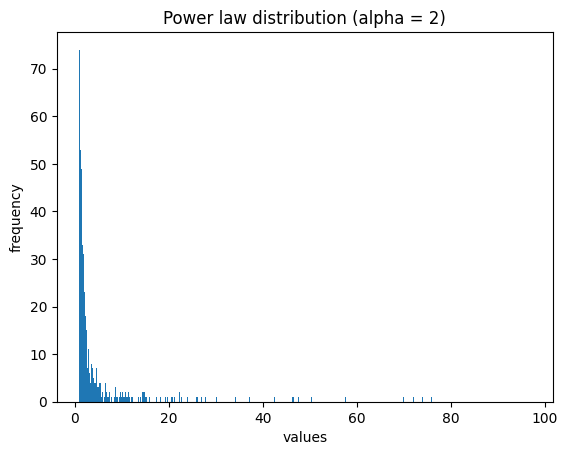

In [9]:
generated_power_law_data_1 = generate_power_law_sample(2, 1, 100, 100000)
plt.hist(generated_power_law_data_1, bins=1000)
plt.xlabel("values")
plt.ylabel("frequency")
plt.title(f"Power law distribution (alpha = 2)")
plt.show()


Looks like it follows a power law distribution, now on to the testing of the Bessi two sample discrete power-law distribution test

Text(0.5, 1.0, 'Power law distribution (alpha = 2)')

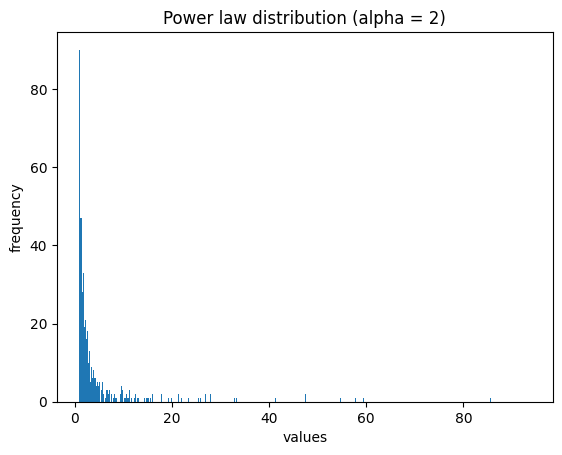

In [10]:
# generate another sample with the same chosen alpha value
generated_power_law_data_2 = generate_power_law_sample(2.05, 1, 100, 100000)
plt.hist(generated_power_law_data_2, bins=1000)
plt.xlabel("values")
plt.ylabel("frequency")
plt.title("Power law distribution (alpha = 2)")

In [11]:
generated_power_law_data_2

array([ 1.27603401,  1.08357206,  9.88941058,  1.14803353,  1.4946099 ,
        5.11647705,  2.58429031,  5.11541477,  1.01702681, 15.16675204,
        1.54218841,  2.26922516,  1.43981634,  3.85363127,  9.77547565,
        6.85646778,  1.14142462,  1.14091502,  1.06432592,  4.74084283,
        2.20084532,  1.35100032,  1.31505087,  4.65973672,  5.76700042,
        4.74053139,  1.4355109 ,  1.59472193,  2.22182631,  1.04442788,
        1.97707314,  1.28782977,  3.37219481, 72.94385653,  1.25356049,
        5.09222324,  1.2655705 ,  1.60866964,  3.10957592,  3.94202816,
        1.02617244,  1.19095261,  4.31443184,  1.6789586 ,  4.18904924,
        1.43193104,  1.49735114,  2.99965117,  1.35042633,  3.0361043 ,
        4.26894997,  3.00622451,  8.15945936,  3.24235622,  6.41619191,
        2.18747544,  6.95459354, 10.98059296,  1.46904255,  2.07729531,
        7.12568251,  3.63971426,  3.11161543,  3.045163  ,  1.0278991 ,
        1.21503403,  2.08100935,  1.29838715,  1.55627078,  1.39

In [12]:
generated_power_law_data_2.shape[0]

933

In [13]:
generated_power_law_data_1.shape[0]

948

Lamba 0.299941899186706
p-value 0.4160811529501789


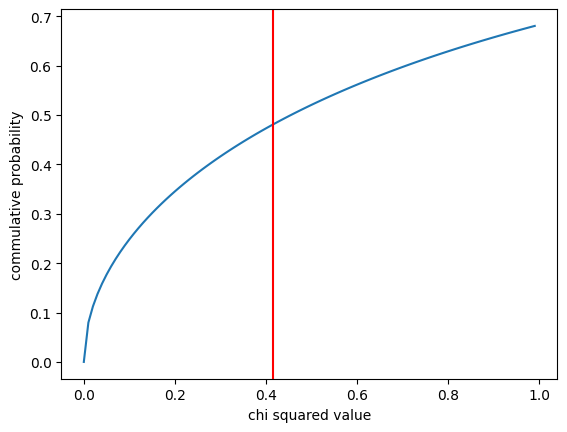

In [14]:
print('Lamba',Bessis_LAMBDA(generated_power_law_data_1, generated_power_law_data_2))
print('p-value', chi_squared_test(generated_power_law_data_1, generated_power_law_data_2))